# TAREA 1

Importamos bibliotecas que se van a usar

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import IPython
import platform
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.feature_selection
import sklearn.model_selection
import graphviz
import scipy.stats as st
from scipy import stats
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from itertools import cycle

## Parte 1


Cargamos los datos de los votos de los participantes en la encuesta, a partir del archivo participants_votes.csv

In [ ]:
participants_votes = "https://raw.githubusercontent.com/proyectourgente/cuestionario-luc/main/datos/participants_votes.csv"
df = pd.read_csv(participants_votes)
df

,Unnamed: 0,8,9,10,11,6,2,3,4,7,...,75,76,77,78,79,80,81,82,conv,17
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5,NaN
1,1,-1.0,1.0,0.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,5,NaN
2,2,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,5,NaN
3,3,-1.0,1.0,0.0,-1.0,1.0,1.0,1.0,-1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
4,4,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16493,3476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
16494,3477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
16495,3485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
16496,3489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN


## Parte 2

Se cambian los nombres de las columnas para mayor claridad.

In [ ]:
df1 = df.rename({"Unnamed: 0":"Persona", "0":"vota_si", "4":"vota_no", "2":"firmo", "conv":"cuestionario"}, axis = 1)
df1.set_index("Persona", inplace = True)

#Mostramos las columnas que nos interesan
pd.DataFrame(df1, columns=["vota_si", "vota_no", "firmo", "cuestionario"])

,vota_si,vota_no,firmo,cuestionario
Persona,,,,
0,0.0,0.0,0.0,5
1,1.0,-1.0,1.0,5
2,1.0,-1.0,1.0,5
3,1.0,-1.0,1.0,5
4,1.0,-1.0,1.0,5
...,...,...,...,...
3476,NaN,1.0,NaN,9
3477,NaN,-1.0,NaN,9
3485,NaN,NaN,NaN,9


## Parte 3

Generamos una columna en el DataFrame para ver si la persona respondió de forma consistente a la pregunta vota_si y a la pregunta vota_no.

In [ ]:
df1["respuesta_consistente"]= df1["vota_si"] == -df1["vota_no"]

#Muestro las columnas que me interesan
pd.DataFrame(df1, columns=["vota_si", "vota_no", "firmo", "cuestionario", "respuesta_consistente"])

,vota_si,vota_no,firmo,cuestionario,respuesta_consistente
Persona,,,,,
0,0.0,0.0,0.0,5,True
1,1.0,-1.0,1.0,5,True
2,1.0,-1.0,1.0,5,True
3,1.0,-1.0,1.0,5,True
4,1.0,-1.0,1.0,5,True
...,...,...,...,...,...
3476,NaN,1.0,NaN,9,False
3477,NaN,-1.0,NaN,9,False
3485,NaN,NaN,NaN,9,False


## Parte 4

Calculamos el porcentaje de personas que respondieron de forma inconsistente.

In [ ]:
#El boolean True lo toma como float 1, el boolean False lo toma como float 0.

df1[["respuesta_consistente"]].mean()

respuesta_consistente    0.745848
dtype: float64

In [ ]:
respuesta_inconsistente = int((1- df1[["respuesta_consistente"]].mean())*100)
print("El porcentaje de personas que respondieron de forma inconsistente es:", respuesta_inconsistente, "%" )

El porcentaje de personas que respondieron de forma inconsistente es: 25 %


## Parte 5

Filtramos los datos, eliminando las personas con respuestas inconsistentes.

In [ ]:
df1 = df1[df1["respuesta_consistente"]==True]

#Mostramos las columnas que nos interesan
pd.DataFrame(df1, columns=["vota_si", "vota_no", "firmo", "cuestionario", "respuesta_consistente"])

,vota_si,vota_no,firmo,cuestionario,respuesta_consistente
Persona,,,,,
0,0.0,0.0,0.0,5,True
1,1.0,-1.0,1.0,5,True
2,1.0,-1.0,1.0,5,True
3,1.0,-1.0,1.0,5,True
4,1.0,-1.0,1.0,5,True
...,...,...,...,...,...
3487,0.0,0.0,NaN,9,True
3488,-1.0,1.0,NaN,9,True
3490,-1.0,1.0,NaN,9,True


## Parte 6

Generamos un nuevo DataFrame que contenga sólo las 4 columnas seleccionadas, y las columnas ‘vota_si’, ‘vota_no’, ‘firmo’, ‘cuestionario’.


In [ ]:
df_nuevo = pd.DataFrame(df1, columns=["vota_si", "vota_no", "firmo", "cuestionario", "8", "9", "10", "11"])
df_nuevo

,vota_si,vota_no,firmo,cuestionario,8,9,10,11
Persona,,,,,,,,
0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0
1,1.0,-1.0,1.0,5,-1.0,1.0,0.0,-1.0
2,1.0,-1.0,1.0,5,-1.0,1.0,1.0,-1.0
3,1.0,-1.0,1.0,5,-1.0,1.0,0.0,-1.0
4,1.0,-1.0,1.0,5,-1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...
3487,0.0,0.0,NaN,9,-1.0,1.0,NaN,-1.0
3488,-1.0,1.0,NaN,9,-1.0,1.0,NaN,1.0
3490,-1.0,1.0,NaN,9,-1.0,1.0,NaN,1.0


## Parte 7


Agrupamos el DataFrame por la intención de voto de las personas.

In [ ]:
df_nuevo.groupby("vota_si")["vota_si"].count()

vota_si
-1.0    4945
 0.0    1996
 1.0    5364
Name: vota_si, dtype: int64

Quiere decir que del total de personas, la intentcion de 4945 personas es votar que NO, la de 1996 no se sabe porque pasaron esta pregunta y la de 5364 es votar que SI

## Parte 7 - Adicional

Se puede ver la intencion de voto para cada una de las preguntas seleccionadas arriba:

In [ ]:
print(df_nuevo.groupby("vota_si").count())
print("--------------------------------------------------------")
print(df_nuevo.groupby("vota_no").count())

         vota_no  firmo  cuestionario     8     9   10    11
vota_si                                                     
-1.0        4945    764          4945  3372  3559  499  3638
 0.0        1996    476          1996  1419  1479  340  1538
 1.0        5364   1218          5364  3655  3859  883  3962
--------------------------------------------------------
         vota_si  firmo  cuestionario     8     9   10    11
vota_no                                                     
-1.0        5364   1218          5364  3655  3859  883  3962
 0.0        1996    476          1996  1419  1479  340  1538
 1.0        4945    764          4945  3372  3559  499  3638


## Parte 8

Calcule el valor medio de las respuestas a las diferentes preguntas seleccionadas, agrupando según la intención de voto.

In [ ]:
df_nuevo.groupby("vota_si")[["8", "9", "10", "11"]].mean()

,8,9,10,11
vota_si,,,,
-1.0,-0.064947,0.211014,-0.294589,0.663551
0.0,-0.196617,0.306964,0.105882,0.282185
1.0,-0.545280,0.682560,0.593431,-0.367744


## Parte 8 - Adicional

Otra forma de visualizar esto, detallando qué metodo se esta aplicando es el siguiente:

In [ ]:
print(df_nuevo.groupby("vota_si").agg({"8":[np.mean], "9":[np.mean], "10":[np.mean], "11":[np.mean]}))

                8         9        10        11
             mean      mean      mean      mean
vota_si                                        
-1.0    -0.064947  0.211014 -0.294589  0.663551
 0.0    -0.196617  0.306964  0.105882  0.282185
 1.0    -0.545280  0.682560  0.593431 -0.367744


Interpretacion de Resultados:


8  --> El Instituto de Colonización debería vender sus tierras para obtener recursos para el Estado

9  --> Es importante exigir que las personas que tienen terrenos de Colonización vivan en el predio. De lo contrario, se facilita la corrupción

10 --> La venta de tierras del Instituto de Colonización no es una buena idea porque afectará fuertemente la agricultura familiar

11 --> Los precios del combustible deben reflejar claramente el precio del petróleo y tender a eliminar los costos de ANCAP
​

Las personas que votan SI al referendum -valor 1.0- tienden a estar en desacuerdo con el enunciado 11 y de acuerdo con el enunciado 10.
Lo opuesto ocurre para las personas que votan No al referendum -valor -1.0- , tienden a estar de acuerdo con el enunciado 11 y en desacuerdo con el enunciado 10.

Con relacion al enunciado 8, pareceria que la mayoria de las personas estan en desacuerdo, independientemente de la intecion de voto.

Con relacion al enunciado 9, pareceria que la  mayoria de las personas estan de acuerdo, independientemetne de la intecion de voto.



# TAREA 2

## Parte 1

a) Calculamos la media de la intención de voto, a partir de las respuestas consistentes.

b) Calcular el desvío estándar (SD) de la media de la intención de voto.



In [ ]:
intencion_voto = df1["vota_si"].agg([np.mean, np.std])
intencion_voto

mean    0.034051
std     0.914712
Name: vota_si, dtype: float64

c) Verificamos si la intención de voto es significativamente diferente de 0 (verificamos si el intervalo media +- 1.96 SD incluye 0)


In [ ]:
st.t.interval(alpha=0.95, df=len(df1["vota_si"])-1,
              loc=np.mean(df1["vota_si"]),
              scale=st.sem(df1["vota_si"]))

(0.01788773697175575, 0.050214660427675376)

El intervalo es (0.01788773697175575, 0.050214660427675376), no contiene al 0, con lo cual la informacion disponible permite afrimar con 95% de confianza que la intencion de voto es significativamente diferente a 0.

In [ ]:
# Verificamos el funcionamiento del la funcion st.t.interval

print(st.sem(df1["vota_si"]))
print(0.914712/math.sqrt(12305))

0.008246004432635401
0.008246004501776342


## Parte 2

Verificamos si la intención de voto
cambia entre los diferentes grupos demograficos. Para ello:

a) Calculamos la media de intención de voto de cada grupo (la herramienta de
agrupar los datos puede serle útil).

b) Calculamos el desvío estándar de la media de cada grupo

In [ ]:
df1.groupby("cuestionario")["vota_si"].agg([np.mean, np.std])

,mean,std
cuestionario,,
5,0.105593,0.859153
6,-0.143854,0.953209
7,-0.028995,0.943161
8,-0.107353,0.959537
9,0.011011,0.981275


c) Hacemos un gráfico de barras con las media +- 1.96 SD.


In [ ]:
#Se crea un df para hacer el grafico de barras con la media y la desviacion estandar para cada cuestionario

df_grafico = df1.groupby("cuestionario")["vota_si"].agg([np.mean, np.std])
df_grafico

,mean,std
cuestionario,,
5,0.105593,0.859153
6,-0.143854,0.953209
7,-0.028995,0.943161
8,-0.107353,0.959537
9,0.011011,0.981275


In [ ]:
# Vemos cual es el valor de N para cada grupo demografico
df1.groupby("cuestionario")["vota_si"].count()

cuestionario
5    6383
6    1147
7    1552
8     680
9    2543
Name: vota_si, dtype: int64

In [ ]:
# Agregamos al dataframe, una columna que tiene este valor de N
df_grafico["N_subpoblacion"] = df1.groupby("cuestionario")["vota_si"].count()
df_grafico

,mean,std,N_subpoblacion
cuestionario,,,
5,0.105593,0.859153,6383
6,-0.143854,0.953209,1147
7,-0.028995,0.943161,1552
8,-0.107353,0.959537,680
9,0.011011,0.981275,2543


In [ ]:
# Se calcula el SD (el desvio estandar de la media)

SD = dict()
for cuestionario in df1.groupby("cuestionario")["vota_si"].count().index:
    SD[cuestionario] = df_grafico["std"][cuestionario]/math.sqrt(df_grafico["N_subpoblacion"][cuestionario])

# Se convierte en una serie para operar con el dataframe
SD_series = pd.Series(SD)
SD_series

5    0.010754
6    0.028145
7    0.023941
8    0.036797
9    0.019459
dtype: float64

In [ ]:
# Agregamos al dataframe, la columna que contiene 1.96*SD_series

df_grafico["SD*1.96"]= 1.96*SD_series
df_grafico

,mean,std,N_subpoblacion,SD*1.96
cuestionario,,,,
5,0.105593,0.859153,6383,0.021077
6,-0.143854,0.953209,1147,0.055165
7,-0.028995,0.943161,1552,0.046924
8,-0.107353,0.959537,680,0.072121
9,0.011011,0.981275,2543,0.038139


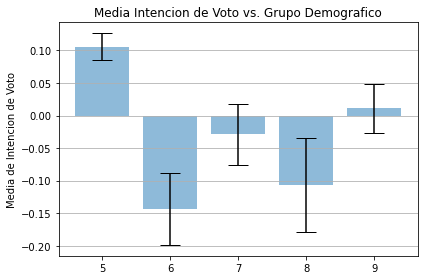

In [ ]:
#Se hace grafico de barras con la media y la desviacion estandar

name_bar = df_grafico.index
number_of_bars = np.arange(len(df_grafico.index))
bar_value_mean = df_grafico["mean"]
bar_value_sd = df_grafico["SD*1.96"]

# Contruimos el plot
fig, ax = plt.subplots()
ax.bar(number_of_bars, bar_value_mean, yerr=bar_value_sd, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel("Media de Intencion de Voto")
ax.set_xticks(number_of_bars)
ax.set_xticklabels(name_bar)
ax.set_title("Media Intencion de Voto vs. Grupo Demografico")
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig("Media Intencion de Voto vs. Grupo Demografico.png")
plt.show()

Se puede afirmar con una confianza del 95% que el grupo demografico 6 y 8 tienen una intencion de voto negativa (NO al referendum), mientras que el grupo demografico 5 tiene una intencion de voto postiva (SI al referendum).
Los grupos demograficos 7 y 9 nos se puede afirmar su intencion de voto con un 95%

d) Discutimos brevemente el resultado del ejercicio 1) en relación con lo observado en el ejercicio 2)

Se bien se puede afirmar con un 95% de confianza que la intencion de voto tiene una media positiva (en su mayoria vota SI al referendum), se puede observar de la parte 2 con un 95% de confianza, que por grupo demografico el comportamiento es distinto.


## Parte 3

a) Calculamos la media de las respuestas de cada pregunta. Mientras mayor sea el
valor, mayor aprobación tiene en la población.


In [ ]:
todas_columnas = df1.columns.array
columnas_no = ["vota_si", "vota_no", "firmo", "cuestionario", "respuesta_consistente"]
columnas_preguntas = list(set(todas_columnas)-set(columnas_no))
columnas_preguntas

df1_preguntas = df1[columnas_preguntas]
df1_preguntas

,59,17,57,26,76,25,74,70,73,51,...,10,50,36,56,68,31,44,41,30,19
Persona,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,NaN,-1.0,1.0,1.0,1.0,-1.0,NaN,1.0,1.0,...,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,-1.0,NaN,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
3,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,0.0,-1.0,-1.0,NaN,NaN,1.0,1.0,1.0,1.0,-1.0
4,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,1.0,-1.0,NaN,NaN,1.0,1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,NaN,-1.0,1.0,-1.0,-1.0,NaN,0.0,NaN,1.0,NaN,...,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN
3488,NaN,-1.0,1.0,1.0,1.0,NaN,1.0,NaN,-1.0,NaN,...,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,-1.0,1.0,NaN
3490,NaN,1.0,1.0,1.0,-1.0,NaN,1.0,NaN,-1.0,NaN,...,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,-1.0,1.0,NaN


In [ ]:
#Generamos un nuevo df con las medias de las preguntas

df1_preguntas_mean = df1_preguntas.mean()
df1_preguntas_mean

59   -0.047026
17   -0.174922
57    0.245610
26    0.334252
76    0.011966
        ...   
31    0.313175
44    0.428884
41    0.044881
30    0.507473
19    0.011945
Length: 80, dtype: float64

b) Hacemos un histograma de las medias de las preguntas

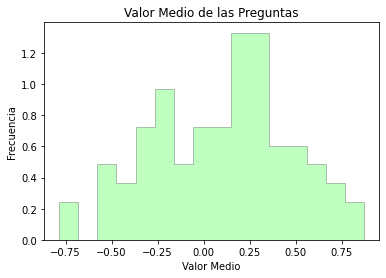

In [ ]:
#Hacemos un histograma de las medias de las preguntas

plt.hist(df1_preguntas_mean, bins=16, density=True, alpha=0.25,
         histtype='stepfilled', color='lime',
         edgecolor='black')

plt.title("Valor Medio de las Preguntas")
plt.xlabel("Valor Medio")
plt.ylabel("Frecuencia")
plt.savefig("Valor Medio de las Preguntas.png")
plt.show()

c) Vemos el texto de las 5 preguntas con mayor y con menor valores medios en las
respuestas en la página de github del proyecto. Reflexionamos brevemente sobre
el resultado obtenido.


In [ ]:
# ordeno las medias de forma ascendente
values_ordered = df1_preguntas_mean.sort_values(ascending=True)

# obtengo las preguntas con las 5 mayores medias y las 5 menores medias.
max5 = values_ordered[-5:]
min5 = values_ordered[:5]

# paso max5 y min5 a una lista de numeros
max5_numeros = [int(i) for i in max5.index.array]
min5_numeros = [int(i) for i in min5.index.array]

print(max5_numeros)
print(min5_numeros)

[21, 18, 25, 79, 35]
[36, 22, 80, 7, 82]


In [ ]:
# Cargo el archivo comments que contiene las preguntas
comments = "https://raw.githubusercontent.com/proyectourgente/cuestionario-luc/main/datos/comments.csv"
df_comments = pd.read_csv(comments)

df_comments.set_index("general-id", inplace = True)

max5_preguntas = df_comments.loc[max5_numeros]["comment-body"]
min5_preguntas = df_comments.loc[min5_numeros]["comment-body"]


print("Las 5 preguntas con mayor valor medio son:\n")
for numero in max5_numeros:
    print(numero, ")", max5_preguntas[numero])
print("\n")
print("Las 5 preguntas con menor valor medio son:\n")
for numero in min5_numeros:
    print(numero, ")", min5_preguntas[numero])

Las 5 preguntas con mayor valor medio son:

21 ) Eliminar la obligatoriedad de la educación inicial es un retroceso para el sistema educativo
18 ) El Estado debería pagar a sus proveedores a través de bancos para garantizar la transparencia en el uso de los fondos públicos
25 ) En la educación formal la prioridad es lograr procesos educativos completos y continuos que fortalezcan la cultura general
79 ) El uso de  herramientas, como el referéndum, para corregir medidas del gobierno de turno es democrático
35 ) Los responsables de los menores deberían estar obligados a inscribirlos al sistema educativo aunque esto implique destinar algo de tiempo a hacer trámites


Las 5 preguntas con menor valor medio son:

36 ) Los responsables de los menores no deberían estar obligados a inscribirlos al sistema educativo para disminuir la cantidad de trámites que deben realizar
22 ) Eliminar la obligatoriedad de la educación inicial es una buena idea porque da más libertad a los padres
80 ) Creo que 

REFLEXION:

Se observa que 3 de las 5 preguntas con mayor valor medio:

* 21 ) Eliminar la obligatoriedad de la educación inicial es un retroceso para el sistema educativo
* 35 ) Los responsables de los menores deberían estar obligados a inscribirlos al sistema educativo aunque esto implique destinar algo de tiempo a hacer trámites
* 79 ) El uso de  herramientas, como el referéndum, para corregir medidas del gobierno de turno es democrático


tienen su contra parte en 3 de 5 perguntas con menor valor medio:

* 22 ) Eliminar la obligatoriedad de la educación inicial es una buena idea porque da más libertad a los padres
* 36 ) Los responsables de los menores no deberían estar obligados a inscribirlos al sistema educativo para disminuir la cantidad de trámites que deben realizar
* 80 ) Creo que el referéndum, aunque sea obligatorio, no me afecta directamente


Esto demuestra coherencia en los datos en el sentido que las consultas con mayor acuerdo tienen a sus consultas opuesta como las de menor acuerdo.

## Parte 4

a) Calculo el desvío estándar de las respuestas a cada pregunta

In [ ]:
df1_preguntas_std = df1_preguntas.std()
df1_preguntas_std

59    0.935572
17    0.937125
57    0.938028
26    0.887119
76    0.933488
        ...   
31    0.877311
44    0.865948
41    0.941634
30    0.770843
19    0.903654
Length: 80, dtype: float64

b) Haga un histograma con los desvíos estándar de las preguntas


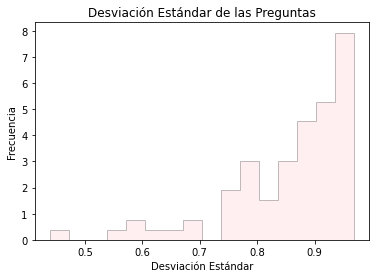

In [ ]:
plt.hist(df1_preguntas_std, bins=16, density=True, alpha=0.25,
         histtype='stepfilled', color='pink',
         edgecolor='black')

plt.title("Desviación Estándar de las Preguntas")
plt.xlabel("Desviación Estándar")
plt.ylabel("Frecuencia")
plt.savefig("Desviación Estándar de las Preguntas.png")
plt.show()


c) Vemos el texto de las 5 preguntas con mayor y menor SD. Reflexione
brevemente sobre el resultado obtenido.

In [ ]:
# ordeno las std de forma ascendente
values_ordered = df1_preguntas_std.sort_values(ascending=True)

# obtengo las preguntas con las 5 mayores medias y las 5 menores medias.
max5_std = values_ordered[-5:]
min5_std = values_ordered[:5]

# paso max5 y min5 a una lista de numeros
max5_std_numeros = [int(i) for i in max5_std.index.array]
min5_std_numeros = [int(i) for i in min5_std.index.array]

print(max5_std_numeros)
print(min5_std_numeros)

[46, 39, 50, 75, 47]
[35, 36, 79, 22, 25]


In [ ]:
max5_std_preguntas = df_comments.loc[max5_std_numeros]["comment-body"]
min5_std_preguntas = df_comments.loc[min5_std_numeros]["comment-body"]


print("Las 5 preguntas con mayor std son:\n")
for numero in max5_std_numeros:
    print(numero, ")", max5_std_preguntas[numero])
print("\n")
print("Las 5 preguntas con menor std son:\n")
for numero in min5_std_numeros:
    print(numero, ")", min5_std_preguntas[numero])

Las 5 preguntas con mayor std son:

46 ) Que la Policía pueda registrar a una persona aunque no tenga autorización judicial es bueno porque facilita las cosas y el accionar de la Policía
39 ) Es necesario considerar delitos específicos el insulto o las amenazas a la policía, para respaldar la autoridad policial
50 ) Que las personas privadas de libertad reduzcan las condenas a través de estudio o trabajo no debería permitirse; si cometieron un delito grave deben cumplir la totalidad de la condena
75 ) Poder detener a personas por "hechos de apariencia delictiva" por ley fomenta una cultura de discriminación y violencia
47 ) Que la Policía pueda registrar a una persona sin autorización previa de un fiscal limita garantías de personas civiles y facilita abusos contra ellas


Las 5 preguntas con menor std son:

35 ) Los responsables de los menores deberían estar obligados a inscribirlos al sistema educativo aunque esto implique destinar algo de tiempo a hacer trámites
36 ) Los responsable

REFLEXION:

Se observa que las preguntas con mayor varabilidad corresponden a temas  polémicos de la agenda pública durante la campaña del referendum. Al tener esto en cuenta parece lógico que las respuestas a dichas preguntas presenten una mayor variablidad.

Por otro lado, se observa que las preguntas con menor variabilidad se corresponden a las que en el punto anterior se encontraban entre las 5 con mayor valor medio y las 5 con menor valor medio. Teniendo esto en cuenta, parece lógico que las respuestas a dichas preguntas presenten una menor variablidad.

# TAREA 3

## Parte 1

Limpieza de datos. Filtro
los datos para quedarme sólo con las filas en que la columna que indica si la persona firmó tiene valor -1 o 1 (es decir, elimine los NaN y los 0). Nota: Comience con la
tabla de datos que tiene respuestas consistentes a la intención de voto, como
generó en la tarea 1.

In [ ]:
df1

,8,9,10,11,6,firmo,3,vota_no,7,12,...,76,77,78,79,80,81,82,cuestionario,17,respuesta_consistente
Persona,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5,NaN,True
1,-1.0,1.0,0.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,5,NaN,True
2,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,5,NaN,True
3,-1.0,1.0,0.0,-1.0,1.0,1.0,1.0,-1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,True
4,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,-1.0,1.0,NaN,-1.0,NaN,NaN,NaN,0.0,NaN,1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,9,-1.0,True
3488,-1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,9,-1.0,True
3490,-1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,9,1.0,True


In [ ]:
#  Filtro los datos, me quedo sólo con las filas en que la columna "firmo" tiene valor -1 o 1

df_filtrado = df1[(df1["firmo"]==1) | (df1["firmo"]==-1)]
df_filtrado

,8,9,10,11,6,firmo,3,vota_no,7,12,...,76,77,78,79,80,81,82,cuestionario,17,respuesta_consistente
Persona,,,,,,,,,,,,,,,,,,,,,
1,-1.0,1.0,0.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,5,NaN,True
2,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,5,NaN,True
3,-1.0,1.0,0.0,-1.0,1.0,1.0,1.0,-1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,True
4,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,True
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,NaN,1.0,0.0,NaN,-1.0,1.0,1.0,-1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,True
3412,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,True
3413,-1.0,0.0,0.0,-1.0,0.0,1.0,1.0,-1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,True


## Parte 2

Me fijo qué columnas del DataFrame filtrado en tienen menos de 25% de las respuestas con NaN.

In [ ]:
# calculo el 25%

len(df_filtrado)*0.25


543.0

In [ ]:
# cuento los valores NaN en cada una de las columnas, veo aquellas tal que la sumatoria sea menor a 543

sumatoria_nulos = df_filtrado.isna().sum()
sumatoria_nulos[ sumatoria_nulos < len(df_filtrado)*0.25]

firmo                      0
3                         30
vota_no                    0
vota_si                    0
13                       499
15                       524
27                       531
40                       518
49                       525
33                       294
47                       482
48                       504
52                       520
1                          0
43                       519
34                       253
cuestionario               0
respuesta_consistente      0
dtype: int64

Selecciono algunas de estas columnas para usar en el clasificador, y genero un nuevo DataFrame que contenga sólo esas columnas y la columna ‘firmo’

In [ ]:
df_clasificador = df_filtrado[["firmo", "34", "47", "13", "48", "43", "52", "15"]]
df_clasificador

,firmo,34,47,13,48,43,52,15
Persona,,,,,,,,
1,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
2,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
3,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
4,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
5,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...
3410,1.0,-1.0,1.0,NaN,-1.0,1.0,1.0,1.0
3412,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
3413,1.0,-1.0,1.0,1.0,0.0,-1.0,0.0,1.0


## Parte 3

Elimine todas las filas que tienen algún valor NaN en las columnas seleccionadas.
De esta forma, ya tiene un DataFrame pronto para entrenar un clasificador.


In [ ]:
df_ClasificadorLimpio = df_clasificador.dropna()
df_ClasificadorLimpio

,firmo,34,47,13,48,43,52,15
Persona,,,,,,,,
1,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
2,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
3,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
4,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
3407,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
3408,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
3412,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0


## Parte 4

Separo los datos en un set de entrenamiento y un set de testeo. Use el 20% de los datos para testear el modelo.


In [ ]:
# Primero separamos las X de las y

df_clasificador_X = df_ClasificadorLimpio[["34", "47", "13", "48", "43", "52", "15"]]
df_clasificador_y = df_ClasificadorLimpio[["firmo"]]

# Construimos los corpus de entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(df_clasificador_X, df_clasificador_y, test_size=0.20, random_state=33)

display(X_train.shape)
display(X_test.shape)

(1163, 7)

(291, 7)

In [ ]:
# Observo cual es mi X_train
print(X_train)

          34   47   13   48   43   52   15
Persona                                   
1762     1.0  1.0  1.0 -1.0  1.0  1.0  1.0
896      1.0  1.0  1.0  1.0 -1.0 -1.0  1.0
1389    -1.0  1.0  1.0 -1.0 -1.0  1.0 -1.0
2200     1.0 -1.0  0.0 -1.0  1.0  1.0 -1.0
2278    -1.0  1.0  1.0  1.0  1.0 -1.0  1.0
...      ...  ...  ...  ...  ...  ...  ...
2878     1.0  1.0  1.0  1.0  1.0 -1.0  1.0
1416    -1.0 -1.0  1.0  1.0  1.0 -1.0  1.0
1214     1.0 -1.0  1.0 -1.0 -1.0  1.0  1.0
743     -1.0  1.0  1.0  1.0  1.0 -1.0  1.0
2385    -1.0  1.0  0.0  0.0  0.0  1.0  0.0

[1163 rows x 7 columns]


## Parte 5

Entreno un clasificador con los datos de entrenamiento. Puede ser, por ejemplo, un árbol de decisión.

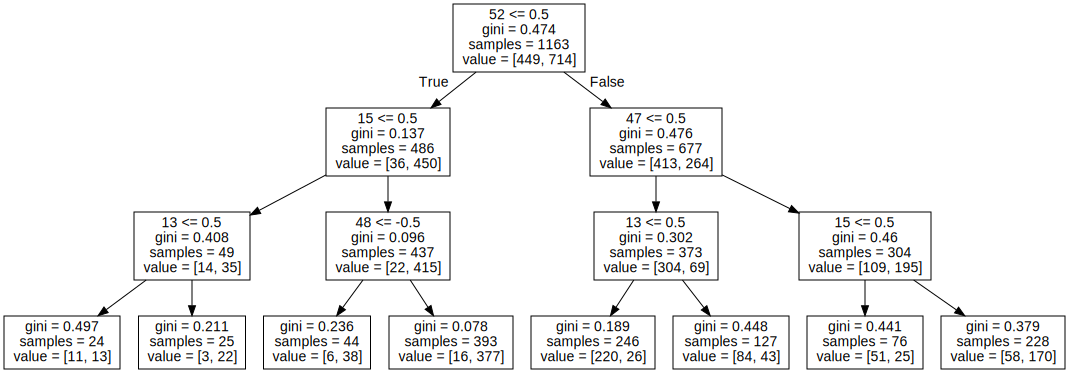

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3 , min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

src = graphviz.Source(tree.export_graphviz(clf, feature_names=["34", "47", "13", "48", "43", "52", "15" ]))
src

##Parte 6

Obtengo el rendimiento en el set de entrenamiento y el set de testeo, utilizando
como medidas accuracy, precision y recall. Comparo estos rendimientos, y discuto
por qué son diferentes.


In [ ]:
# Evaluro el modelo con el set de entrenamiento
y_pred_train = clf.predict(X_train)


# Evaluo el modelo con el set de testeo
y_pred_test = clf.predict(X_test)

In [ ]:
print("Rendimimento en el set de entrenamiento")
print("Accuracy:{0:.3f}".format(accuracy_score(y_train, y_pred_train)),  "\n")

print("Classification report del set de entrenamiento")
print(classification_report(y_train, y_pred_train),"\n")

print("--------------------------------vs.-----------------------------------------", "\n")

print("Rendimimento en el set de testeo")
print("Accuracy:{0:.3f}".format(accuracy_score(y_test, y_pred_test)),  "\n")

print("Classification report del set de testeo")
print(classification_report(y_test, y_pred_test),"\n")

Rendimimento en el set de entrenamiento
Accuracy:0.838 

Classification report del set de entrenamiento
              precision    recall  f1-score   support

        -1.0       0.79      0.79      0.79       449
         1.0       0.87      0.87      0.87       714

    accuracy                           0.84      1163
   macro avg       0.83      0.83      0.83      1163
weighted avg       0.84      0.84      0.84      1163
 

--------------------------------vs.----------------------------------------- 

Rendimimento en el set de testeo
Accuracy:0.780 

Classification report del set de testeo
              precision    recall  f1-score   support

        -1.0       0.70      0.72      0.71       109
         1.0       0.83      0.81      0.82       182

    accuracy                           0.78       291
   macro avg       0.77      0.77      0.77       291
weighted avg       0.78      0.78      0.78       291
 



DISCUSIÓN:

Si bien se obtienen rendimientos similares, al evaluar el clasificador con el set de entrenamiento y el set de testeo se verifica que el rendimiento es mayor en el primer caso. Esto se debe a que los parámetros del clasificador fueron entrenados utilizando el set de entrenamiento y por lo tanto se obtiene una respuesta mejor con dicho set de datos que con los datos contenidos en el set de testeo.

La separación de datos en set distintos de entrenamietno y testeo (parte 4) como paso previo a entrenar el clasificador permite evaluar el clasificador obtenido (con el set de entrenamiento) con datos desconocidos por el modelo(set de testeo). Uno de los puntos que se puede detectar con esto es si clasificador presenta un sobreajuste a los datos del set de entrenamiento.

## Parte 7

Grafico el rendimiento del modelo para diferentes valores de alguno de los
parámetros utilizados (e.g. max_depth), evaluando sobre el conjunto de entrenamiento y sobre el de testeo.
Discuta brevemente sus observaciones. ¿Puede identificar sobreajuste en su
modelo?

In [ ]:
# Se grafica el rendimiento del modelo para diferentes valores de max_depth, sobre el conjunto de entrenamiento y sobre el de testeo

#rendimiento de set de entrenamiento
precisions_train = dict()
recalls_train = dict()
accuracy_score_train = dict()
f1_scores_train = dict()

#rendimiento de set de testeo
precisions_test = dict()
recalls_test = dict()
accuracy_score_test = dict()
f1_scores_test = dict()

for md in range(1,11,1):
    clf = tree.DecisionTreeClassifier(max_depth=md, min_samples_leaf=5)
    clf = clf.fit(X_train,y_train)
    #para set de entrenamiento
    y_pred_train = clf.predict(X_train)
    precisions_train[md] = precision_score(y_train, y_pred_train)
    recalls_train[md] = recall_score(y_train, y_pred_train)
    f1_scores_train[md] = f1_score(y_train, y_pred_train)
    accuracy_score_train[md] = accuracy_score(y_train, y_pred_train)
    #para el set de entrenamiento
    y_pred_test= clf.predict(X_test)
    precisions_test[md] = precision_score(y_test, y_pred_test)
    recalls_test[md] = recall_score(y_test, y_pred_test)
    f1_scores_test[md] = f1_score(y_test, y_pred_test)
    accuracy_score_test[md] = accuracy_score(y_test, y_pred_test)

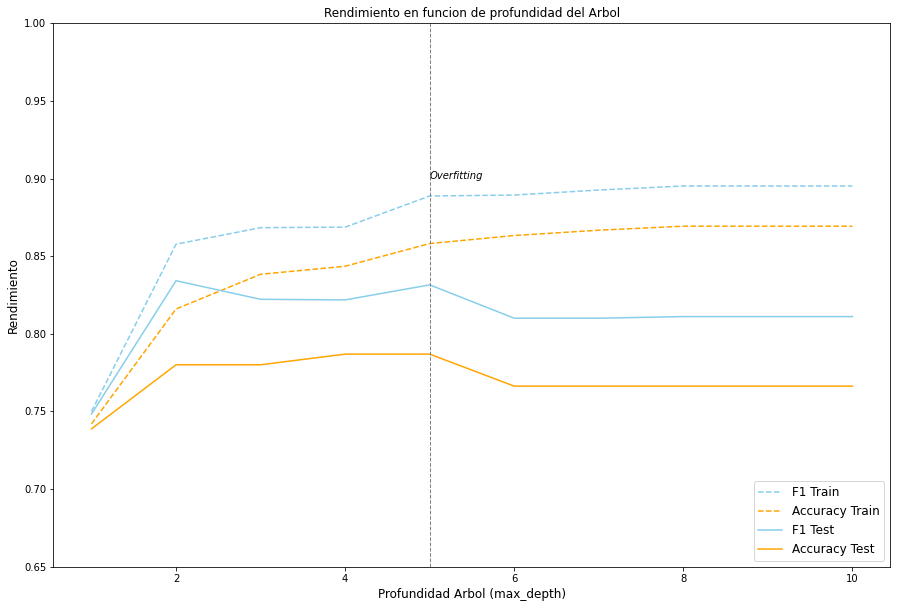

In [ ]:
# Ploteamos en el axe las diferentes curvas de rendimiento para set de entrenamiento
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 1, 1)
ax.set_ylim(0.65, 1)

#plt.plot(list(precisions_train.keys()),list(precisions_train.values()), linestyle="--", linewidth="1.5", color="violet", label="Precision Train")
#plt.plot(list(recalls_train.keys()),list(recalls_train.values()), linestyle="--", linewidth="1.5", color="green", label="Recall Train")
plt.plot(list(f1_scores_train.keys()),list(f1_scores_train.values()), linestyle="--", linewidth="1.5", color="skyblue", label="F1 Train")
plt.plot(list(accuracy_score_train.keys()),list(accuracy_score_train.values()), linestyle="--", linewidth="1.5", color="orange", label="Accuracy Train")

# Ploteamos en el axe las diferentes curvas de rendimiento para set de testeo

#plt.plot(list(precisions_test.keys()),list(precisions_test.values()), linestyle="-", linewidth="1.5", color="violet", label="Precision Test")
#plt.plot(list(recalls_test.keys()),list(recalls_test.values()), linestyle="-", linewidth="1.5", color="green", label="Recall Test")
plt.plot(list(f1_scores_test.keys()),list(f1_scores_test.values()), linestyle="-", linewidth="1.5", color="skyblue", label="F1 Test")
plt.plot(list(accuracy_score_test.keys()),list(accuracy_score_test.values()), linestyle="-", linewidth="1.5", color="orange", label="Accuracy Test")

# Le ponemos un tìtulo y tìtulos a los ejes, por supuesto
plt.title("Rendimiento en funcion de profundidad del Arbol", fontsize=12)
plt.xlabel("Profundidad Arbol (max_depth)", fontsize=12)
plt.ylabel("Rendimiento", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.axvline(5, color="grey", linestyle="--", linewidth="1")
plt.text(5, 0.9, "Overfitting", color="black", fontsize=10, fontstyle="italic")
plt.show()

El evaluar el rendimiento sobre el conjunto de entrenamiento y el de testeo para disitntos valores del parámetro "max_depth" se observa:

* inicialmente el rendimeinto crece en forma similar para ambos canjuntos de datos a medida que se aumenta el valor del parámetro "max_depth"
* a partir de determinado valor del parámetro "max_depth" el rendimeinto mejora al utilizar el conjunto de entrenamiento pero decrece sobre el conjunto de testo

Este comportamiento, en donde el rendieminto sobre el conjunto de entrenamiento crece al tiempo que sobre el conjunto de testeo decrece, se corresponde con un sobreajuste del modelo al momento de entrenar el clasficador. Se detecta sobreajuste a partir de algún valor entre 2 y 5 del parámetro max_depth.

DISCUSIÓN:

Una vez que detectamos la posibilidad de obtener un mejor rendimiento del clasificador al variar el valor del parámetro "max_depth" debemos introducir algunos cambios al entrenamiento de forma de incluir etapas que nos permitan determinar el mejor valor para este hiperparámetro.

Para poder establecer el valor más adecuado para "max_depth", tenemos dos posibilidades:

1) separar el set de entrenamiento en dos de sets (entrenamiento y validación), de forma de utilizar uno de ellos para entrenar el modelo y el otro para determinar el hiperparámentro "max_depth"

2) hacer Cross Validation con el set de entrenamiento

A continuación se propone seguir la opción 2) para determinar el mejor valor para el parámetro "max_depth".

In [ ]:
# Hacemos entonces cross-validation

accuracy=np.zeros(10)
precision=np.zeros(10)
recall=np.zeros(10)
f1=np.zeros(10)

for md in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=md+1, min_samples_leaf=5)
    # Se implementa K Fold con 5 grupos
    kf=sklearn.model_selection.KFold(n_splits=5)
    # Se inicializan los arreglos np donde se guardan los score
    scores_accuracy=np.zeros(5)
    scores_precision=np.zeros(5)
    scores_recall=np.zeros(5)
    scores_f1=np.zeros(5)
    score_index=0

    # Para cada max_depth recorremos cada uno de los subgrupos de los K Fold
    for train_index, test_index in kf.split(X_train):
        # Se definen los grupos de entrenamiento y de testeo para cada subgrupo
        X_train_cv, X_test_cv= X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv= y_train.iloc[train_index], y_train.iloc[test_index]
        # se crea el clasificador para ese sugrupo
        clf = clf.fit(X_train_cv,y_train_cv)
        y_pred=clf.predict(X_test_cv)
        # se guardan todos los valores de rendimiento para cada subgrupo
        scores_accuracy[score_index]=metrics.accuracy_score(y_test_cv, y_pred)
        scores_precision[score_index]=metrics.precision_score(y_test_cv, y_pred)
        scores_recall[score_index]=metrics.recall_score(y_test_cv, y_pred)
        scores_f1[score_index]=metrics.f1_score(y_test_cv, y_pred)
        score_index += 1
    # Para cada max_depth se promedia el resultado de todos los K Fold
    accuracy[md]=np.mean(scores_accuracy)
    precision[md]=np.mean(scores_precision)
    recall[md]=np.mean(scores_recall)
    f1[md]=np.mean(scores_f1)
    # Se imprime el resultado de cada max_depth
    print ("Profundidad {0:d} --> Accuracy: {1:.3f} (+/-{2:.3f}), Precision: {3:.3f} (+/-{4:.3f}), Recall: {5:.3f} (+/-{6:.3f}), F1: {7:.3f} (+/-{8:.3f})".
           format(
               md+1,
               accuracy[md], st.sem(scores_accuracy),
               precision[md], st.sem(scores_precision),
               recall[md], st.sem(scores_recall),
               f1[md], st.sem(scores_f1)
            ))

Profundidad 1 --> Accuracy: 0.742 (+/-0.005), Precision: 0.926 (+/-0.007), Recall: 0.630 (+/-0.006), F1: 0.750 (+/-0.006)
Profundidad 2 --> Accuracy: 0.794 (+/-0.006), Precision: 0.792 (+/-0.008), Recall: 0.900 (+/-0.015), F1: 0.842 (+/-0.007)
Profundidad 3 --> Accuracy: 0.827 (+/-0.004), Precision: 0.860 (+/-0.005), Recall: 0.858 (+/-0.007), F1: 0.859 (+/-0.005)
Profundidad 4 --> Accuracy: 0.830 (+/-0.004), Precision: 0.868 (+/-0.008), Recall: 0.853 (+/-0.016), F1: 0.860 (+/-0.005)
Profundidad 5 --> Accuracy: 0.833 (+/-0.009), Precision: 0.849 (+/-0.012), Recall: 0.888 (+/-0.010), F1: 0.868 (+/-0.006)
Profundidad 6 --> Accuracy: 0.821 (+/-0.008), Precision: 0.838 (+/-0.013), Recall: 0.880 (+/-0.011), F1: 0.858 (+/-0.005)
Profundidad 7 --> Accuracy: 0.824 (+/-0.007), Precision: 0.842 (+/-0.012), Recall: 0.878 (+/-0.009), F1: 0.860 (+/-0.004)
Profundidad 8 --> Accuracy: 0.823 (+/-0.006), Precision: 0.841 (+/-0.012), Recall: 0.878 (+/-0.009), F1: 0.859 (+/-0.004)
Profundidad 9 --> Accura

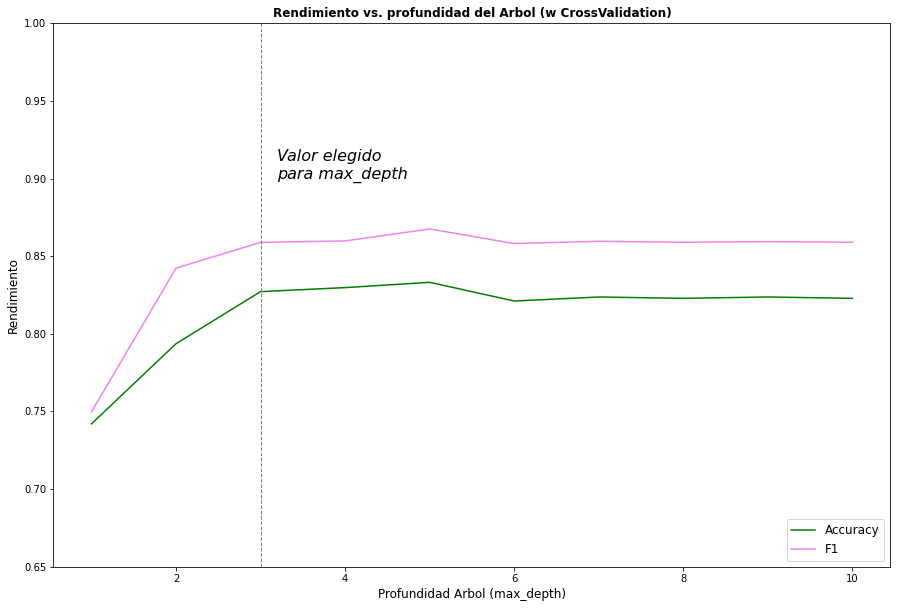

In [ ]:
# Graficamos el rendimiento del clasificador, en funcion del max_depth, para el set de entrenamiento con cross validation
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 1, 1)
ax.set_ylim(0.65, 1)

plt.plot(np.arange(1,11), accuracy, linestyle="-", linewidth="1.5", color="green", label="Accuracy")
plt.plot(np.arange(1,11),f1, linestyle="-", linewidth="1.5", color="violet", label="F1")
plt.axvline(3, color="grey", linestyle="--", linewidth="1")
plt.text(3.2, 0.90, "Valor elegido\npara max_depth", color="black", fontsize=16, fontstyle="italic")

# Le ponemos un tìtulo y tìtulos a los ejes, por supuesto
plt.title("Rendimiento vs. profundidad del Arbol (w CrossValidation)", fontsize=12, fontweight="semibold")
plt.xlabel("Profundidad Arbol (max_depth)", fontsize=12)
plt.ylabel("Rendimiento", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

A partir de la Cross Validation se selecciona una profundidad max_depth = 3. A continuación se visualiza el árbol de decisión entrenado para dicho valor.

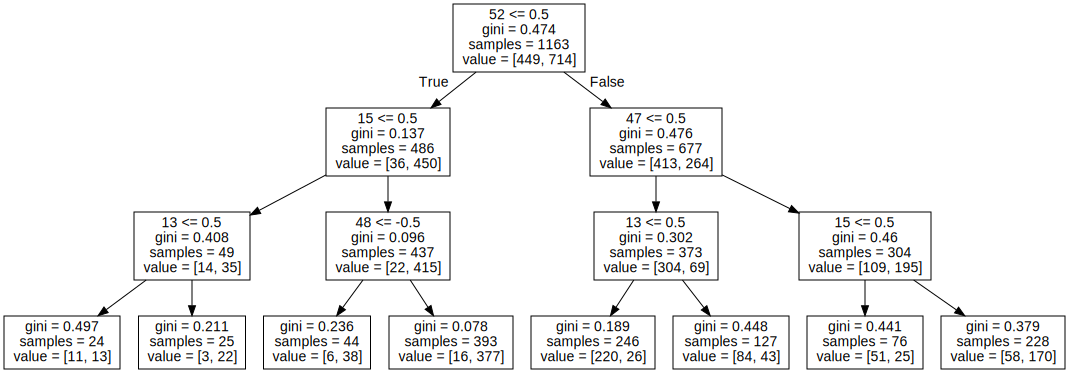

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3 , min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

src = graphviz.Source(tree.export_graphviz(clf, feature_names=["34", "47", "13", "48", "43", "52", "15" ]))
src